In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

In [2]:
df_final = pd.read_csv("GOOGL_data.csv",na_values=['null'],index_col='date',parse_dates=True,infer_datetime_format=True)
df_final.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL


In [3]:
df_final.drop(df_final.columns[[5]], axis=1, inplace=True)
df_final.head()

,open,high,low,close,volume
date,,,,,
2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199
2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781
2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176
2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946
2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971


In [4]:
df_final.shape

(1259, 5)

# Plotting the close column

<AxesSubplot:xlabel='date'>

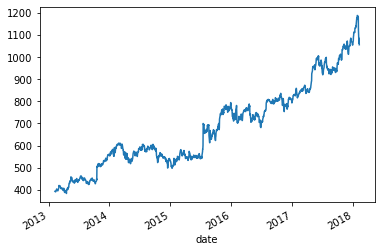

In [5]:
df_final['close'].plot()

# Correlating the features with close

In [6]:
D = df_final.drop(['close'],axis=1)

<AxesSubplot:title={'center':'Correlation with Close Feature'}>

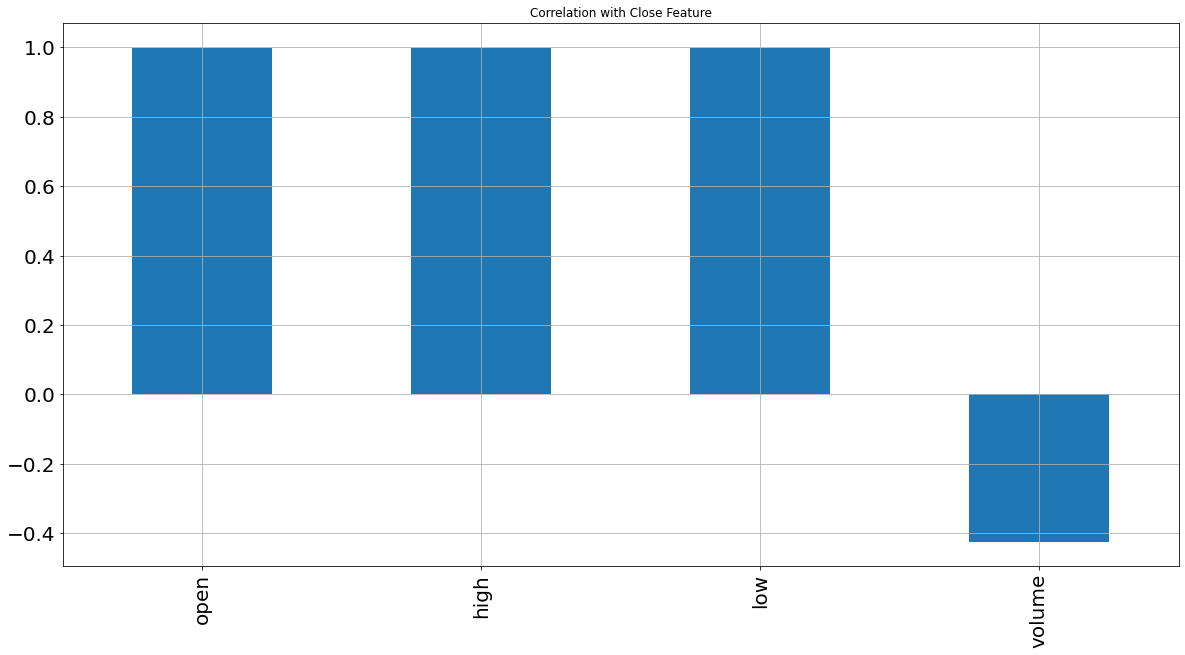

In [7]:
D.corrwith(df_final['close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Close Feature", fontsize = 20,
        rot = 90, grid = True)

In [8]:
#We can see that all other features except volume are positively correlated
test = df_final
# Target column
target = pd.DataFrame(test['close'])
display(test.head())

,open,high,low,close,volume
date,,,,,
2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199
2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781
2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176
2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946
2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971


In [9]:
feature_columns = ['open', 'high', 'low', 'volume']

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,open,high,low,volume
date,,,,
2013-02-08,0.006837,0.004411,0.011405,0.243547
2013-02-11,0.005759,0.002137,0.007784,0.168388
2013-02-12,0.007847,0.005173,0.011287,0.141133
2013-02-13,0.006837,0.003593,0.011661,0.082779
2013-02-14,0.006588,0.005694,0.010290,0.130207


In [11]:
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target.shape)

Shape of features :  (1259, 4)
Shape of target :  (1259, 1)


In [12]:
target = target.shift(-1)
validation_y = target[-100:-1]
target = target[:-100]

In [13]:
validation_X = feature_minmax_transform[-100:-1]
feature_minmax_transform = feature_minmax_transform[:-100]
display(validation_X.tail())
display(validation_y.tail())

,open,high,low,volume
date,,,,
2018-01-31,0.994782,0.985542,0.985107,0.056576
2018-02-01,0.985044,0.986940,0.981695,0.139433
2018-02-02,0.924561,0.917434,0.909233,0.237400
2018-02-05,0.891175,0.897244,0.841454,0.161611
2018-02-06,0.808203,0.863066,0.808169,0.146320


,close
date,
2018-01-31,1181.59
2018-02-01,1119.20
2018-02-02,1062.39
2018-02-05,1084.43
2018-02-06,1055.41


In [14]:
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target.shape)
display(target.tail())

Shape of features :  (1159, 4)
Shape of target :  (1159, 1)


,close
date,
2017-09-08,943.29
2017-09-11,946.65
2017-09-12,950.44
2017-09-13,940.13
2017-09-14,935.29


# Splitting into training and testing sets

In [15]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target[:len(train_index)].values.ravel(), target[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [16]:
X_train.shape

(1054, 4)

In [17]:
X_train

,open,high,low,volume
date,,,,
2013-02-08,0.006837,0.004411,0.011405,0.243547
2013-02-11,0.005759,0.002137,0.007784,0.168388
2013-02-12,0.007847,0.005173,0.011287,0.141133
2013-02-13,0.006837,0.003593,0.011661,0.082779
2013-02-14,0.006588,0.005694,0.010290,0.130207
...,...,...,...,...
2017-04-10,0.568562,0.565180,0.572542,0.023208
2017-04-11,0.568761,0.562572,0.564834,0.020032
2017-04-12,0.564727,0.561445,0.568557,0.027167


In [18]:
y_train.shape

(1054,)

In [19]:
y_train

array([391.6012, 390.7403, 391.8214, ..., 840.18  , 855.13  , 853.99  ])

In [20]:
X_test.shape

(105, 4)

In [21]:
X_test

,open,high,low,volume
date,,,,
2017-04-18,0.582260,0.578367,0.585567,0.018346
2017-04-19,0.588293,0.581845,0.588403,0.024717
2017-04-20,0.591226,0.586463,0.593350,0.029513
2017-04-21,0.592322,0.584618,0.593636,0.028807
2017-04-24,0.602060,0.606306,0.604072,0.051951
...,...,...,...,...
2017-09-08,0.703251,0.693873,0.696096,0.021162
2017-09-11,0.700138,0.696324,0.697329,0.036077
2017-09-12,0.699789,0.690636,0.692970,0.033753


In [22]:
y_test.shape

(105,)

In [23]:
y_test

array([ 856.51,  860.08,  858.95,  878.93,  888.84,  889.14,  891.44,
        924.52,  932.82,  937.09,  948.45,  954.72,  950.28,  958.69,
        956.71,  954.84,  955.89,  955.14,  959.22,  964.61,  942.17,
        950.5 ,  954.65,  964.07,  970.55,  977.61,  991.86,  993.27,
        996.17,  987.09,  988.29,  996.12, 1003.88,  996.68, 1001.59,
       1004.28,  970.12,  961.81,  970.5 ,  967.93,  960.18,  958.62,
        975.22,  968.99,  978.59,  976.62,  986.09,  972.09,  948.09,
        961.01,  937.82,  929.68,  919.46,  932.26,  927.69,  940.81,
        951.  ,  953.53,  967.66,  968.85,  976.91,  975.96,  986.95,
        992.77,  992.19,  993.84,  998.31,  969.03,  965.31,  952.51,
        958.33,  945.5 ,  946.56,  947.64,  940.3 ,  945.79,  945.75,
        944.19,  940.08,  923.59,  930.09,  938.93,  938.08,  944.27,
        927.66,  926.18,  920.87,  940.4 ,  942.58,  936.89,  930.5 ,
        928.13,  935.75,  943.63,  955.24,  951.99,  941.48,  942.02,
        949.89,  941

# Processing the data

In [24]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Model making

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16,input_shape = (1,X_train.shape[1]), activation='relu', return_sequences=True))
model_lstm.add(Dense(12, input_dim=8, activation='relu'))
model_lstm.add(Dense(8, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=150, batch_size=8, verbose=1, shuffle=False,callbacks=[early_stop])

Epoch 1/150
132/132 [==============================] - 0s 3ms/step - loss: 402855.0312 - accuracy: 0.0000e+00
Epoch 2/150
132/132 [==============================] - 0s 2ms/step - loss: 393305.2812 - accuracy: 0.0000e+00
Epoch 3/150
132/132 [==============================] - 0s 2ms/step - loss: 334498.4375 - accuracy: 0.0000e+00
Epoch 4/150
132/132 [==============================] - 0s 2ms/step - loss: 180743.8125 - accuracy: 0.0000e+00
Epoch 5/150
132/132 [==============================] - 0s 2ms/step - loss: 35377.5273 - accuracy: 0.0000e+00
Epoch 6/150
132/132 [==============================] - 0s 2ms/step - loss: 4237.1919 - accuracy: 0.0000e+00
Epoch 7/150
132/132 [==============================] - 0s 2ms/step - loss: 2840.3301 - accuracy: 0.0000e+00
Epoch 8/150
132/132 [==============================] - 0s 2ms/step - loss: 2595.5117 - accuracy: 0.0000e+00
Epoch 9/150
132/132 [==============================] - 0s 2ms/step - loss: 2382.3354 - accuracy: 0.0000e+00
Epoch 10/150
132/13

# Evaluation of lstm model

In [34]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

In [ ]:
print('LSTM: %f'%score_lstm)

In [ ]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

# Plotting the predictions

In [ ]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [ ]:
conda install h5py

In [ ]:
model_json = model_lstm.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_lstm.save_weights("model.h5")
print("Saved model to disk")

In [ ]:
from tensorflow.keras.models import model_from_json

In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
#json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

In [ ]:
loaded_model.compile(loss='mean_squared_error', optimizer='adam')
score = loaded_model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
